In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [24]:
Customer_data = pd.read_excel("Online_Retail.xlsx")
Customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [26]:
# Removing null values
Customer_data_nonnull = Customer_data.dropna(subset=['CustomerID', 'Quantity', 'UnitPrice'])

# Removing Duplicates
Customer_data_nonnull = Customer_data_nonnull.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'CustomerID'])

# Removing negative values
Customer_data_nonnull = Customer_data_nonnull[(Customer_data_nonnull['Quantity'] >= 0) & (Customer_data_nonnull['UnitPrice'] >= 0)]
Customer_data_nonnull['TotalAmountSpent'] = Customer_data_nonnull['Quantity'] * Customer_data_nonnull['UnitPrice']

In [27]:
# Removing Outliers
Q1 = Customer_data_nonnull[['TotalAmountSpent', 'Quantity', 'UnitPrice']].quantile(0.25)
Q3 = Customer_data_nonnull[['TotalAmountSpent', 'Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1

Customer_data_nonnull = Customer_data_nonnull[~((Customer_data_nonnull[['TotalAmountSpent', 'Quantity', 'UnitPrice']] < (Q1 - 1.5 * IQR)) |
                                                (Customer_data_nonnull[['TotalAmountSpent', 'Quantity', 'UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]



In [28]:
total_items_purchased = Customer_data_nonnull.groupby('CustomerID')['Quantity'].sum().reset_index()
total_items_purchased.columns = ['CustomerID', 'TotalItemsPurchased']

last_purchase_date = Customer_data_nonnull.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase_date.columns = ['CustomerID', 'LastPurchaseDate']

total_amount_spent = Customer_data_nonnull.groupby('CustomerID')['TotalAmountSpent'].sum().reset_index()
total_amount_spent.columns = ['CustomerID', 'TotalAmountSpent']

Customer_data_Cleaned = pd.merge(total_items_purchased, last_purchase_date, on='CustomerID')
Customer_data_Cleaned = pd.merge(Customer_data_Cleaned, total_amount_spent, on='CustomerID')

Customer_data_Cleaned['AveragePurchaseValue'] = Customer_data_Cleaned['TotalAmountSpent'] / Customer_data_Cleaned['TotalItemsPurchased']

Customer_data_Cleaned.head()

,CustomerID,TotalItemsPurchased,LastPurchaseDate,TotalAmountSpent,AveragePurchaseValue
0,12347.0,1761,2011-12-07 15:52:00,2901.57,1.647683
1,12348.0,140,2011-04-05 10:47:00,90.20,0.644286
2,12349.0,511,2011-11-21 09:51:00,939.75,1.839041
3,12350.0,196,2011-02-02 16:01:00,294.40,1.502041
4,12352.0,500,2011-11-03 14:37:00,1130.94,2.261880


In [29]:
mean_total_spent = Customer_data_Cleaned['TotalAmountSpent'].mean()
median_total_spent = Customer_data_Cleaned['TotalAmountSpent'].median()
std_total_spent = Customer_data_Cleaned['TotalAmountSpent'].std()

mean_items_purchased = Customer_data_Cleaned['TotalItemsPurchased'].mean()
median_items_purchased = Customer_data_Cleaned['TotalItemsPurchased'].median()
std_items_purchased = Customer_data_Cleaned['TotalItemsPurchased'].std()

# Print basic statistics
print(f"Mean(Total Amount Spent): {mean_total_spent}")
print(f"Median(Total Amount Spent): {median_total_spent}")
print(f"Standard Deviation(Total Amount Spent): {std_total_spent}\n")

print(f"Mean(Total Items Purchased): {mean_items_purchased}")
print(f"Median(Total Items Purchased): {median_items_purchased}")
print(f"Standard Deviation(Total Items Purchased): {std_items_purchased}\n")


Mean(Total Amount Spent): 875.713167990373
Median(Total Amount Spent): 408.39
Standard Deviation(Total Amount Spent): 1828.319510494407

Mean(Total Items Purchased): 562.7439229843562
Median(Total Items Purchased): 261.0
Standard Deviation(Total Items Purchased): 1167.8326917172417



In [30]:
X = Customer_data_Cleaned[['TotalAmountSpent', 'TotalItemsPurchased', 'AveragePurchaseValue']]
print(X)

      TotalAmountSpent  TotalItemsPurchased  AveragePurchaseValue
0              2901.57                 1761              1.647683
1                90.20                  140              0.644286
2               939.75                  511              1.839041
3               294.40                  196              1.502041
4              1130.94                  500              2.261880
...                ...                  ...                   ...
4150            137.00                   40              3.425000
4151             46.92                   52              0.902308
4152            113.13                   51              2.218235
4153           1927.38                 1295              1.488324
4154            767.26                  688              1.115203

[4155 rows x 3 columns]


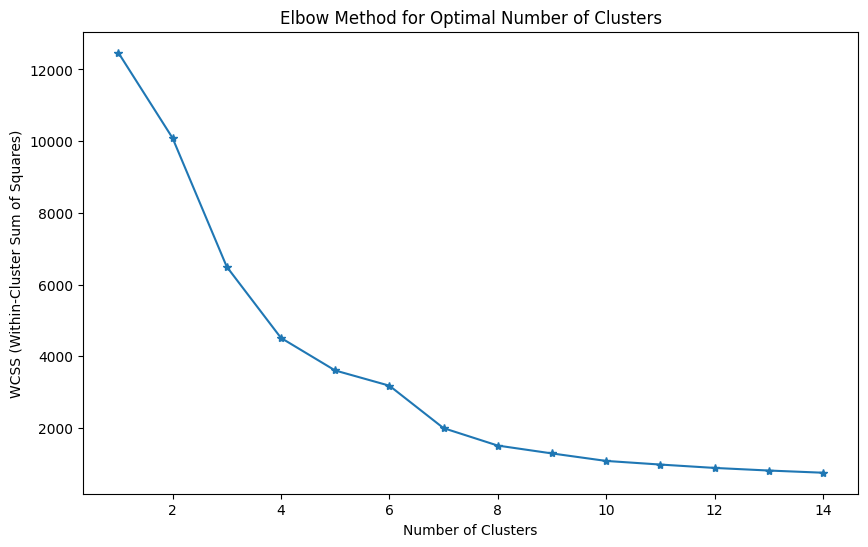

In [39]:
# KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='*', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()



In [ ]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
Customer_data_Cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

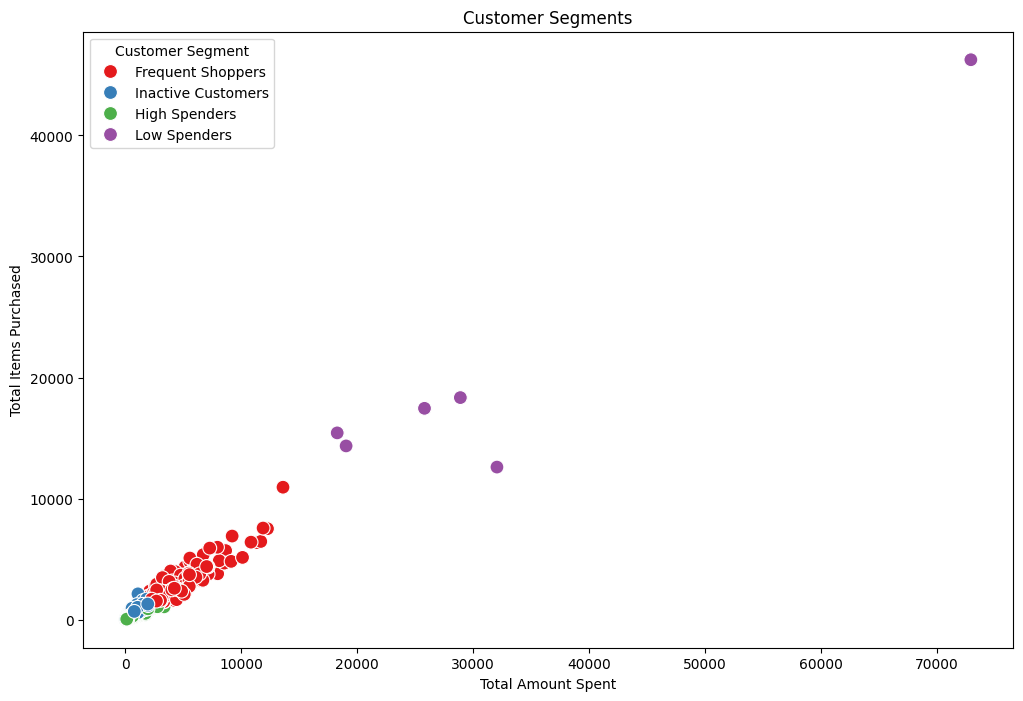

In [ ]:
# Visualizing Clusters
cluster_titles = {
    0: "High Spenders",
    1: "Frequent Shoppers",
    2: "Low Spenders",
    3: "Inactive Customers"
}

Customer_data_Cleaned['Cluster Title'] = Customer_data_Cleaned['Cluster'].map(cluster_titles)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='TotalAmountSpent', y='TotalItemsPurchased', hue='Cluster Title', data=Customer_data_Cleaned, palette='Set1', s=100)
plt.title('Customer Segments')
plt.xlabel('Total Amount Spent')
plt.ylabel('Total Items Purchased')
plt.legend(title='Customer Segment')
plt.show()


In [ ]:
cluster_summary = Customer_data_Cleaned.groupby('Cluster').agg({
    'TotalAmountSpent': ['mean', 'median', 'count'],
    'TotalItemsPurchased': ['mean', 'median'],
    'AveragePurchaseValue': ['mean', 'median']
}).reset_index()

print(cluster_summary)



  Cluster TotalAmountSpent                  TotalItemsPurchased            
                      mean     median count                mean   median   
0       0       364.739861    218.415   858          152.983683     89.5  \
1       1      3820.185961   3262.500   359         2476.002786   2132.0   
2       2     32831.836667  27347.570     6        20741.666667  16445.5   
3       3       599.319111    413.525  2932          407.096180    288.0   

  AveragePurchaseValue            
                  mean    median  
0             2.634968  2.363963  
1             1.576540  1.570027  
2             1.613667  1.526295  
3             1.473695  1.503314  


In [ ]:
for cluster, data in cluster_summary.iterrows():
    print(f"\nCluster {int(data['Cluster'])}:")
    print(f"  Average Total Amount Spent: {data[('TotalAmountSpent', 'mean')]:.2f}")
    print(f"  Median Total Amount Spent: {data[('TotalAmountSpent', 'median')]:.2f}")
    print(f"  Average Total Items Purchased: {data[('TotalItemsPurchased', 'mean')]:.2f}")
    print(f"  Median Total Items Purchased: {data[('TotalItemsPurchased', 'median')]:.2f}")
    print(f"  Number of Customers: {int(data[('TotalAmountSpent', 'count')])}")



Cluster 0:
  Average Total Amount Spent: 364.74
  Median Total Amount Spent: 218.42
  Average Total Items Purchased: 152.98
  Median Total Items Purchased: 89.50
  Number of Customers: 858

Cluster 1:
  Average Total Amount Spent: 3820.19
  Median Total Amount Spent: 3262.50
  Average Total Items Purchased: 2476.00
  Median Total Items Purchased: 2132.00
  Number of Customers: 359

Cluster 2:
  Average Total Amount Spent: 32831.84
  Median Total Amount Spent: 27347.57
  Average Total Items Purchased: 20741.67
  Median Total Items Purchased: 16445.50
  Number of Customers: 6

Cluster 3:
  Average Total Amount Spent: 599.32
  Median Total Amount Spent: 413.52
  Average Total Items Purchased: 407.10
  Median Total Items Purchased: 288.00
  Number of Customers: 2932


/var/folders/_s/qghdfmbj0zn2l50mb9k17y8c0000gn/T/ipykernel_1215/3327591026.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"\nCluster {int(data['Cluster'])}:")
